Парсим json и создаим датафрейм для подготовки данных

In [ ]:
import json
import pandas as pd
#тут ссылка на json файл который нужно загрузить
with open("/content/data (14)(1).json") as json_file:
    data = json.load(json_file)
    df = pd.json_normalize(data)

In [ ]:
data

[{'clientId': 15,
  'total': '1940796',
  'status': 'Не оплачен',
  'promocode': None,
  'products': ['Гондурас Маджестик',
   'Эфиопия Гуджи',
   'Гондурас Тукан Верде',
   'Бразилия Феникс',
   'Никарагуа Марагоджип',
   'Бленд №3',
   'Руанда Мутетели эспрессо',
   'Перу Арабика',
   'Мексика Чьяпас',
   'Бразилия Можиана',
   'Колибри бленд Ecoagricola NMI-Plus',
   'Кения Рука Чуи',
   'Гватемала Уэуэтенанго Лас Амаполас',
   'Бразилия C. Vitoria Venturim CD',
   'Руанда Фуджи',
   'Гондурас Маджестик',
   'Женьшеневый улун',
   'Гречишный чай',
   'Анчан',
   'Матча зеленая',
   'Фильтры бумажные Chemex FS-100',
   'Ветровка',
   'Футболка',
   'Эфиопия Гуджи'],
  'providerKey': 'yataxi',
  'transportType': 'deliveryToDoor',
  'geoData': {'lat': 49.976386, 'lng': 43.824445}},
 {'clientId': 16,
  'total': '575',
  'status': 'Не оплачен',
  'promocode': 'PODKAST15',
  'products': ['Батч-Брю, дрип-пакеты 10 шт/уп'],
  'providerKey': 'rupost',
  'transportType': 'deliveryToPoint',
  

*Все данные распарсились нормально кроме колонки product.Маниупуляции с данным столбцом нельзя проводить*

In [ ]:
df

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng
0,15.0,1940796,Не оплачен,None,"[Гондурас Маджестик, Эфиопия Гуджи, Гондурас Т...",yataxi,deliveryToDoor,49.976386,43.824445
1,16.0,575,Не оплачен,PODKAST15,"[Батч-Брю, дрип-пакеты 10 шт/уп]",rupost,deliveryToPoint,42.864119,43.685593
2,16.0,542,Не оплачен,KANGA20,"[Батч-Брю, дрип-пакеты 10 шт/уп]",cdek,deliveryToDoor,47.445402,49.412738
3,4.0,43194,Не оплачен,None,"[Кения Тирику, Кения Тирику, Бразилия Семья Аг...",yataxi,deliveryToPoint,42.586793,48.499098
4,16.0,782,Не оплачен,KANGA20,[Руанда Фуджи],rupost,deliveryToDoor,42.571287,40.023047
...,...,...,...,...,...,...,...,...,...
950,10.0,None,Ждет оплаты,None,"[Бленд №2, Сан Марко Гондурас, Эфиопия Анасора...",None,None,49.102783,49.544134
951,10.0,None,Ждет оплаты,None,"[Эфиопия Анасора мытая, Эфиопия Анасора натура...",None,None,41.207092,49.193707
952,10.0,None,Ждет оплаты,None,[],None,None,48.310884,41.378579
953,13.0,None,Ждет оплаты,None,[],None,None,47.551592,47.264483


*Данный столбец можно распарсить но каждому товару будет присвоена отдельная строка таблицы что в дальнешем может исказить отчеты ведь клиент может купить тот же товар в другой день а мы не знаем к какому моменту действий привязать.Можно опиратся на столбец total.Но дополнительно создам столбец buy_id что бы фильтровать клиента к каждой покупке*

In [ ]:
df['buy_id'] = df.index
df

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15.0,1940796,Не оплачен,None,"[Гондурас Маджестик, Эфиопия Гуджи, Гондурас Т...",yataxi,deliveryToDoor,49.976386,43.824445,0
1,16.0,575,Не оплачен,PODKAST15,"[Батч-Брю, дрип-пакеты 10 шт/уп]",rupost,deliveryToPoint,42.864119,43.685593,1
2,16.0,542,Не оплачен,KANGA20,"[Батч-Брю, дрип-пакеты 10 шт/уп]",cdek,deliveryToDoor,47.445402,49.412738,2
3,4.0,43194,Не оплачен,None,"[Кения Тирику, Кения Тирику, Бразилия Семья Аг...",yataxi,deliveryToPoint,42.586793,48.499098,3
4,16.0,782,Не оплачен,KANGA20,[Руанда Фуджи],rupost,deliveryToDoor,42.571287,40.023047,4
...,...,...,...,...,...,...,...,...,...,...
950,10.0,None,Ждет оплаты,None,"[Бленд №2, Сан Марко Гондурас, Эфиопия Анасора...",None,None,49.102783,49.544134,950
951,10.0,None,Ждет оплаты,None,"[Эфиопия Анасора мытая, Эфиопия Анасора натура...",None,None,41.207092,49.193707,951
952,10.0,None,Ждет оплаты,None,[],None,None,48.310884,41.378579,952
953,13.0,None,Ждет оплаты,None,[],None,None,47.551592,47.264483,953


In [ ]:
df

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id,iso,geoData.iso_codes
0,15.0,1940796,Не оплачен,None,"[Гондурас Маджестик, Эфиопия Гуджи, Гондурас Т...",yataxi,deliveryToDoor,49.976386,43.824445,0,RU-RUS,None
1,16.0,575,Не оплачен,PODKAST15,"[Батч-Брю, дрип-пакеты 10 шт/уп]",rupost,deliveryToPoint,42.864119,43.685593,1,RU-RUS,None
2,16.0,542,Не оплачен,KANGA20,"[Батч-Брю, дрип-пакеты 10 шт/уп]",cdek,deliveryToDoor,47.445402,49.412738,2,RU-RUS,None
3,4.0,43194,Не оплачен,None,"[Кения Тирику, Кения Тирику, Бразилия Семья Аг...",yataxi,deliveryToPoint,42.586793,48.499098,3,RU-RUS,None
4,16.0,782,Не оплачен,KANGA20,[Руанда Фуджи],rupost,deliveryToDoor,42.571287,40.023047,4,RU-RUS,None
...,...,...,...,...,...,...,...,...,...,...,...,...
950,10.0,None,Ждет оплаты,None,"[Бленд №2, Сан Марко Гондурас, Эфиопия Анасора...",None,None,49.102783,49.544134,950,RU-RUS,None
951,10.0,None,Ждет оплаты,None,"[Эфиопия Анасора мытая, Эфиопия Анасора натура...",None,None,41.207092,49.193707,951,RU-RUS,None
952,10.0,None,Ждет оплаты,None,[],None,None,48.310884,41.378579,952,RU-RUS,None
953,13.0,None,Ждет оплаты,None,[],None,None,47.551592,47.264483,953,RU-RUS,None


*до раскрытия product*

In [ ]:
df[df['buy_id']==0]

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15.0,1940796,Не оплачен,None,"[Гондурас Маджестик, Эфиопия Гуджи, Гондурас Т...",yataxi,deliveryToDoor,49.976386,43.824445,0


In [ ]:
df = df.explode("products",ignore_index = False)

In [ ]:
df

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15.0,1940796,Не оплачен,None,Гондурас Маджестик,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Эфиопия Гуджи,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Гондурас Тукан Верде,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Бразилия Феникс,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Никарагуа Марагоджип,yataxi,deliveryToDoor,49.976386,43.824445,0
...,...,...,...,...,...,...,...,...,...,...
951,10.0,None,Ждет оплаты,None,Эфиопия Анасора мытая,None,None,41.207092,49.193707,951
951,10.0,None,Ждет оплаты,None,Эфиопия Анасора натуральная,None,None,41.207092,49.193707,951
952,10.0,None,Ждет оплаты,None,NaN,None,None,48.310884,41.378579,952
953,13.0,None,Ждет оплаты,None,NaN,None,None,47.551592,47.264483,953


*После раскрытия product.покупки товаров в рамках 1 заказа*

In [ ]:
df[df['buy_id']==0]

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15.0,1940796,Не оплачен,None,Гондурас Маджестик,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Эфиопия Гуджи,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Гондурас Тукан Верде,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Бразилия Феникс,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Никарагуа Марагоджип,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Бленд №3,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Руанда Мутетели эспрессо,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Перу Арабика,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Мексика Чьяпас,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15.0,1940796,Не оплачен,None,Бразилия Можиана,yataxi,deliveryToDoor,49.976386,43.824445,0


In [ ]:
df["status"].unique()

<StringArray>
[    'Не оплачен',       'Оплачено',      'Завершено', 'Вернули деньги',
    'Ждет оплаты', 'Клиент оплатил']
Length: 6, dtype: string

*Заменим Nan на 0 и присвоим столбцам тип значения*

In [ ]:
df = df.fillna(0)
df = df.replace('NaN', 0)
df['total'] = df['total'].astype(int)
df['promocode'] = df['promocode'].astype(str)
df['products'] = df['products'].astype(str)
df['providerKey'] = df['providerKey'].astype(str)
df['transportType'] = df['transportType'].astype(str)
df = df.convert_dtypes()
df.dtypes

clientId           Int64
total              Int64
status            string
promocode         string
products          string
providerKey       string
transportType     string
geoData.lat      Float64
geoData.lng      Float64
buy_id             Int64
dtype: object

In [ ]:
df

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15,1940796,Не оплачен,0,Гондурас Маджестик,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Эфиопия Гуджи,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Гондурас Тукан Верде,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Бразилия Феникс,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Никарагуа Марагоджип,yataxi,deliveryToDoor,49.976386,43.824445,0
...,...,...,...,...,...,...,...,...,...,...
951,10,0,Ждет оплаты,0,Эфиопия Анасора мытая,0,0,41.207092,49.193707,951
951,10,0,Ждет оплаты,0,Эфиопия Анасора натуральная,0,0,41.207092,49.193707,951
952,10,0,Ждет оплаты,0,0,0,0,48.310884,41.378579,952
953,13,0,Ждет оплаты,0,0,0,0,47.551592,47.264483,953


*зальем в sql базу*

In [ ]:
import sqlite3
#зальем в бд
con = sqlite3.connect('db')
df.to_sql('dataset',con,index=False,if_exists='replace')

2261

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
sql = '''SELECT *
FROM dataset

'''

In [ ]:
select(sql)

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15,1940796,Не оплачен,0,Гондурас Маджестик,yataxi,deliveryToDoor,49.976386,43.824445,0
1,15,1940796,Не оплачен,0,Эфиопия Гуджи,yataxi,deliveryToDoor,49.976386,43.824445,0
2,15,1940796,Не оплачен,0,Гондурас Тукан Верде,yataxi,deliveryToDoor,49.976386,43.824445,0
3,15,1940796,Не оплачен,0,Бразилия Феникс,yataxi,deliveryToDoor,49.976386,43.824445,0
4,15,1940796,Не оплачен,0,Никарагуа Марагоджип,yataxi,deliveryToDoor,49.976386,43.824445,0
...,...,...,...,...,...,...,...,...,...,...
2256,10,0,Ждет оплаты,0,Эфиопия Анасора мытая,0,0,41.207092,49.193707,951
2257,10,0,Ждет оплаты,0,Эфиопия Анасора натуральная,0,0,41.207092,49.193707,951
2258,10,0,Ждет оплаты,0,0,0,0,48.310884,41.378579,952
2259,13,0,Ждет оплаты,0,0,0,0,47.551592,47.264483,953



**1 количество заказов и сумма заказов**


In [ ]:
sql = '''
with a as (
SELECT
DISTINCT buy_id,
total
FROM dataset)

SELECT
count(distinct buy_id) as unique_order,
sum(total) as revenue
FROM a


'''

In [ ]:
select(sql)

,unique_order,revenue
0,955,3545541


*Клиенты совершили 955 заказов на сумму 3545541*

**2 Количество оплаченных заказов**

In [ ]:
sql = '''
with a as (
SELECT
DISTINCT buy_id as buy,
status
FROM dataset)

SELECT
COUNT(buy) as finish_chek
FROM a
WHERE status ='Оплачено'
'''

In [ ]:
select(sql)

,finish_chek
0,101


*Со статусом оплачено 101 заказ*

**3. Соотношение Оплаченных заказов, Не оплаченных и Отмененных к общему количеству заказов (исключить заказы разработчиков**

In [ ]:
sql = '''
with a as (
SELECT

DISTINCT buy_id as buy,
status,
clientId,total
FROM dataset)

SELECT
    SUM(CASE WHEN status = 'Оплачено' THEN 1 ELSE 0 END) AS paid_orders,
    SUM(CASE WHEN status = 'Не оплачен' THEN 1 ELSE 0 END) AS unpaid_orders,
        COUNT(*) AS total_orders
FROM a
where total >0;
'''

In [ ]:
select(sql)

,paid_orders,unpaid_orders,total_orders
0,101,246,757


*Не совсем понятно что такое отмененные заказы в статусах не встречается.Сделал оплачено и не оплачено.Сделал фильтр дополнительный исключил заказы разработчиков подрузумевая что сумма их заказа "total" равна 0*. Оплаченных 101 не оплаченных 246 Всего заказов 757*отфильтрованных

**4. Сколько раз был использован промокод (Группировка по названию промокода)**

In [ ]:
sql = '''
with a as (
SELECT

DISTINCT buy_id as buy,
 promocode
FROM dataset)


SELECT promocode, COUNT(promocode) AS promocode_count
FROM a
GROUP BY promocode
ORDER BY 2 DESC
'''

In [ ]:
select(sql)

,promocode,promocode_count
0,0,504
1,KANGA20,211
2,RBA15,142
3,NG2024,41
4,SBER20,32
5,PODKAST15,25


*Больше всего заказов без промокода,с промокодом лидируем KANGA20*





**5.Количество повторных заказов, т.е. пользователь оплатил и подтвердил >1 заказа**

In [ ]:
sql = '''
with a as (
SELECT

DISTINCT buy_id as buy,
status,
clientId
FROM dataset),

b AS (
SELECT clientId, status, COUNT(*) AS count
FROM a
WHERE status = 'Оплачено'
GROUP BY clientId
HAVING COUNT(clientId) > 1
)

SELECT sum(count) FROM b;
'''

In [ ]:
select(sql)

,sum(count)
0,20


*В сумме пользователи совершили 20 повторных заказов*





**6.Наименование товара, которое покупается больше/меньше всего**

In [ ]:
sql = '''
SELECT products, COUNT(products) AS purchase_count
FROM dataset
GROUP BY products
ORDER BY purchase_count ASC
LIMIT 1;
'''

In [ ]:
select(sql)

,products,purchase_count
0,Intenso,1


*Чаще продается Бразилия Феникс меньше всего Intenso*

**7. Службы доставки**

In [ ]:
sql = '''
with a as (
SELECT

DISTINCT buy_id as buy,
providerKey
FROM dataset)


SELECT providerKey, COUNT(providerKey) AS provider_count
FROM a
GROUP BY providerKey
ORDER BY 2 DESC
'''

In [ ]:
select(sql)

,providerKey,provider_count
0,rupost,392
1,yataxi,251
2,cdek,136
3,0,122
4,dpd,54


*Лидируящая служба доставки rupost*

**8. Тип доставки**

In [ ]:
sql = '''
with a as (
SELECT

DISTINCT buy_id as buy,
transportType
FROM dataset)


SELECT transportType, COUNT(transportType) AS transportype_count
FROM a
GROUP BY transportType
ORDER BY 2 DESC
'''

In [ ]:
select(sql)

,transportType,transportype_count
0,deliveryToPoint,757
1,deliveryToDoor,120
2,0,78


*Лидирует тип доставки deliveryToPoint*

**9.Карта доставки. Вывести на карте России, куда осуществлялись доставки**

*С картами нужно еще поработать.Но деятельность на юге России*

In [ ]:
df

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15,1940796,Не оплачен,0,Гондурас Маджестик,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Эфиопия Гуджи,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Гондурас Тукан Верде,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Бразилия Феникс,yataxi,deliveryToDoor,49.976386,43.824445,0
0,15,1940796,Не оплачен,0,Никарагуа Марагоджип,yataxi,deliveryToDoor,49.976386,43.824445,0
...,...,...,...,...,...,...,...,...,...,...
951,10,0,Ждет оплаты,0,Эфиопия Анасора мытая,0,0,41.207092,49.193707,951
951,10,0,Ждет оплаты,0,Эфиопия Анасора натуральная,0,0,41.207092,49.193707,951
952,10,0,Ждет оплаты,0,0,0,0,48.310884,41.378579,952
953,13,0,Ждет оплаты,0,0,0,0,47.551592,47.264483,953


In [ ]:
df1 = df.copy()
df1 = df1.drop_duplicates (subset=['buy_id'])


In [ ]:
df1

,clientId,total,status,promocode,products,providerKey,transportType,geoData.lat,geoData.lng,buy_id
0,15.0,1940796,Не оплачен,None,Гондурас Маджестик,yataxi,deliveryToDoor,49.976386,43.824445,0
1,16.0,575,Не оплачен,PODKAST15,"Батч-Брю, дрип-пакеты 10 шт/уп",rupost,deliveryToPoint,42.864119,43.685593,1
2,16.0,542,Не оплачен,KANGA20,"Батч-Брю, дрип-пакеты 10 шт/уп",cdek,deliveryToDoor,47.445402,49.412738,2
3,4.0,43194,Не оплачен,None,Кения Тирику,yataxi,deliveryToPoint,42.586793,48.499098,3
4,16.0,782,Не оплачен,KANGA20,Руанда Фуджи,rupost,deliveryToDoor,42.571287,40.023047,4
...,...,...,...,...,...,...,...,...,...,...
950,10.0,None,Ждет оплаты,None,Бленд №2,None,None,49.102783,49.544134,950
951,10.0,None,Ждет оплаты,None,Эфиопия Анасора мытая,None,None,41.207092,49.193707,951
952,10.0,None,Ждет оплаты,None,NaN,None,None,48.310884,41.378579,952
953,13.0,None,Ждет оплаты,None,NaN,None,None,47.551592,47.264483,953


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

<ipython-input-11-4948c966ac20>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  russia = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

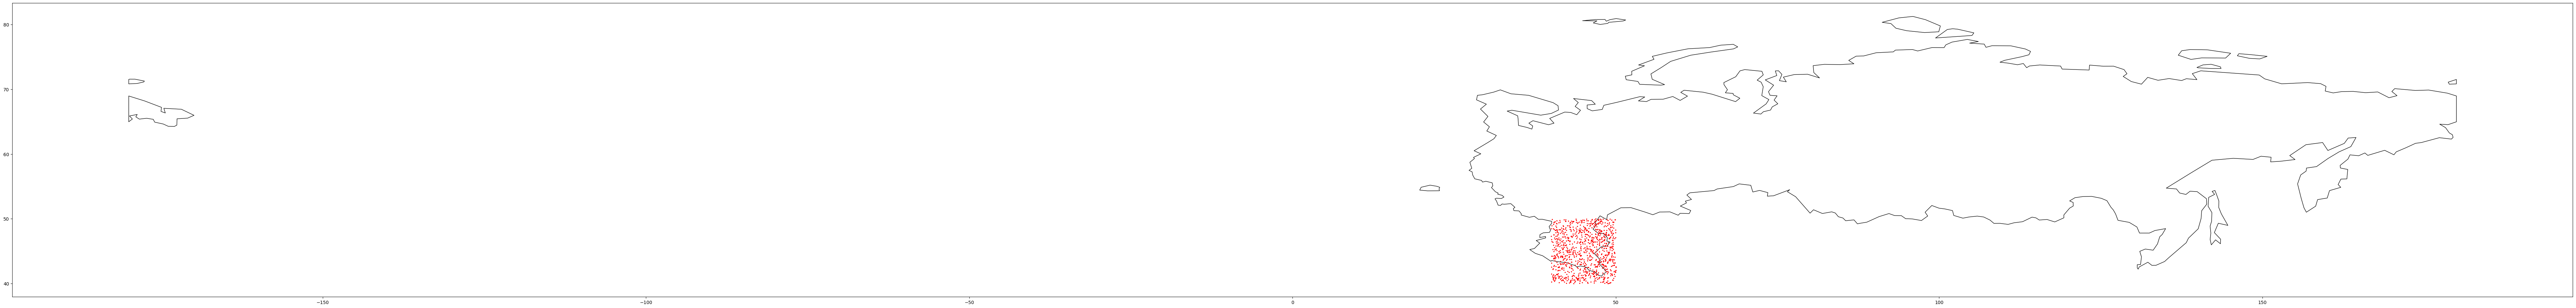

In [ ]:
geometry = [Point(xy) for xy in zip(df1['geoData.lng'], df1['geoData.lat'])]
gdf = gpd.GeoDataFrame(df1, geometry=geometry)

# Загрузка карты России

russia = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

russia = russia[russia['name'] == 'Russia']

# Визуализация данных

russia_plot = russia.plot(color='white', edgecolor='black', figsize=(100, 100))

gdf.plot(ax=russia_plot, color='red', marker='o', markersize=2)

In [ ]:
#перевод данных из долгаты и широты в ISO
from geopy.geocoders import Nominatim
import time
# instantiate a new Nominatim client
app = Nominatim(user_agent="tutorial")

def get_address_by_location(latitude, longitude, language="en"):
    """This function returns an address as raw from a location
    will repeat until success"""
    # build coordinates string to pass to reverse() function
    coordinates = f"{latitude}, {longitude}"
    # sleep for a second to respect Usage Policy

    try:
        return str(app.reverse(coordinates, language=language).raw['address']['ISO3166-2-lvl4'])
    except:
       return None


def get_iso():
  res = []
  for index, row in df.iterrows():
    time.sleep(1)
    data = get_address_by_location(row['geoData.lat'], row['geoData.lng'])
    res.append(data)

  return res

iso_data = get_iso()

In [ ]:
df['iso']= iso_data

*